In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.rename(columns={'R&D Spend':'RDS','Marketing Spend':'MS','Administration':'AD'},inplace =True)

In [4]:
df

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.head()

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.State.nunique()

3

In [7]:
df.shape

(50, 5)

In [8]:
df.describe()

,RDS,AD,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
df.isna().sum()

RDS       0
AD        0
MS        0
State     0
Profit    0
dtype: int64

no null values.

# checking for Multicolinearity

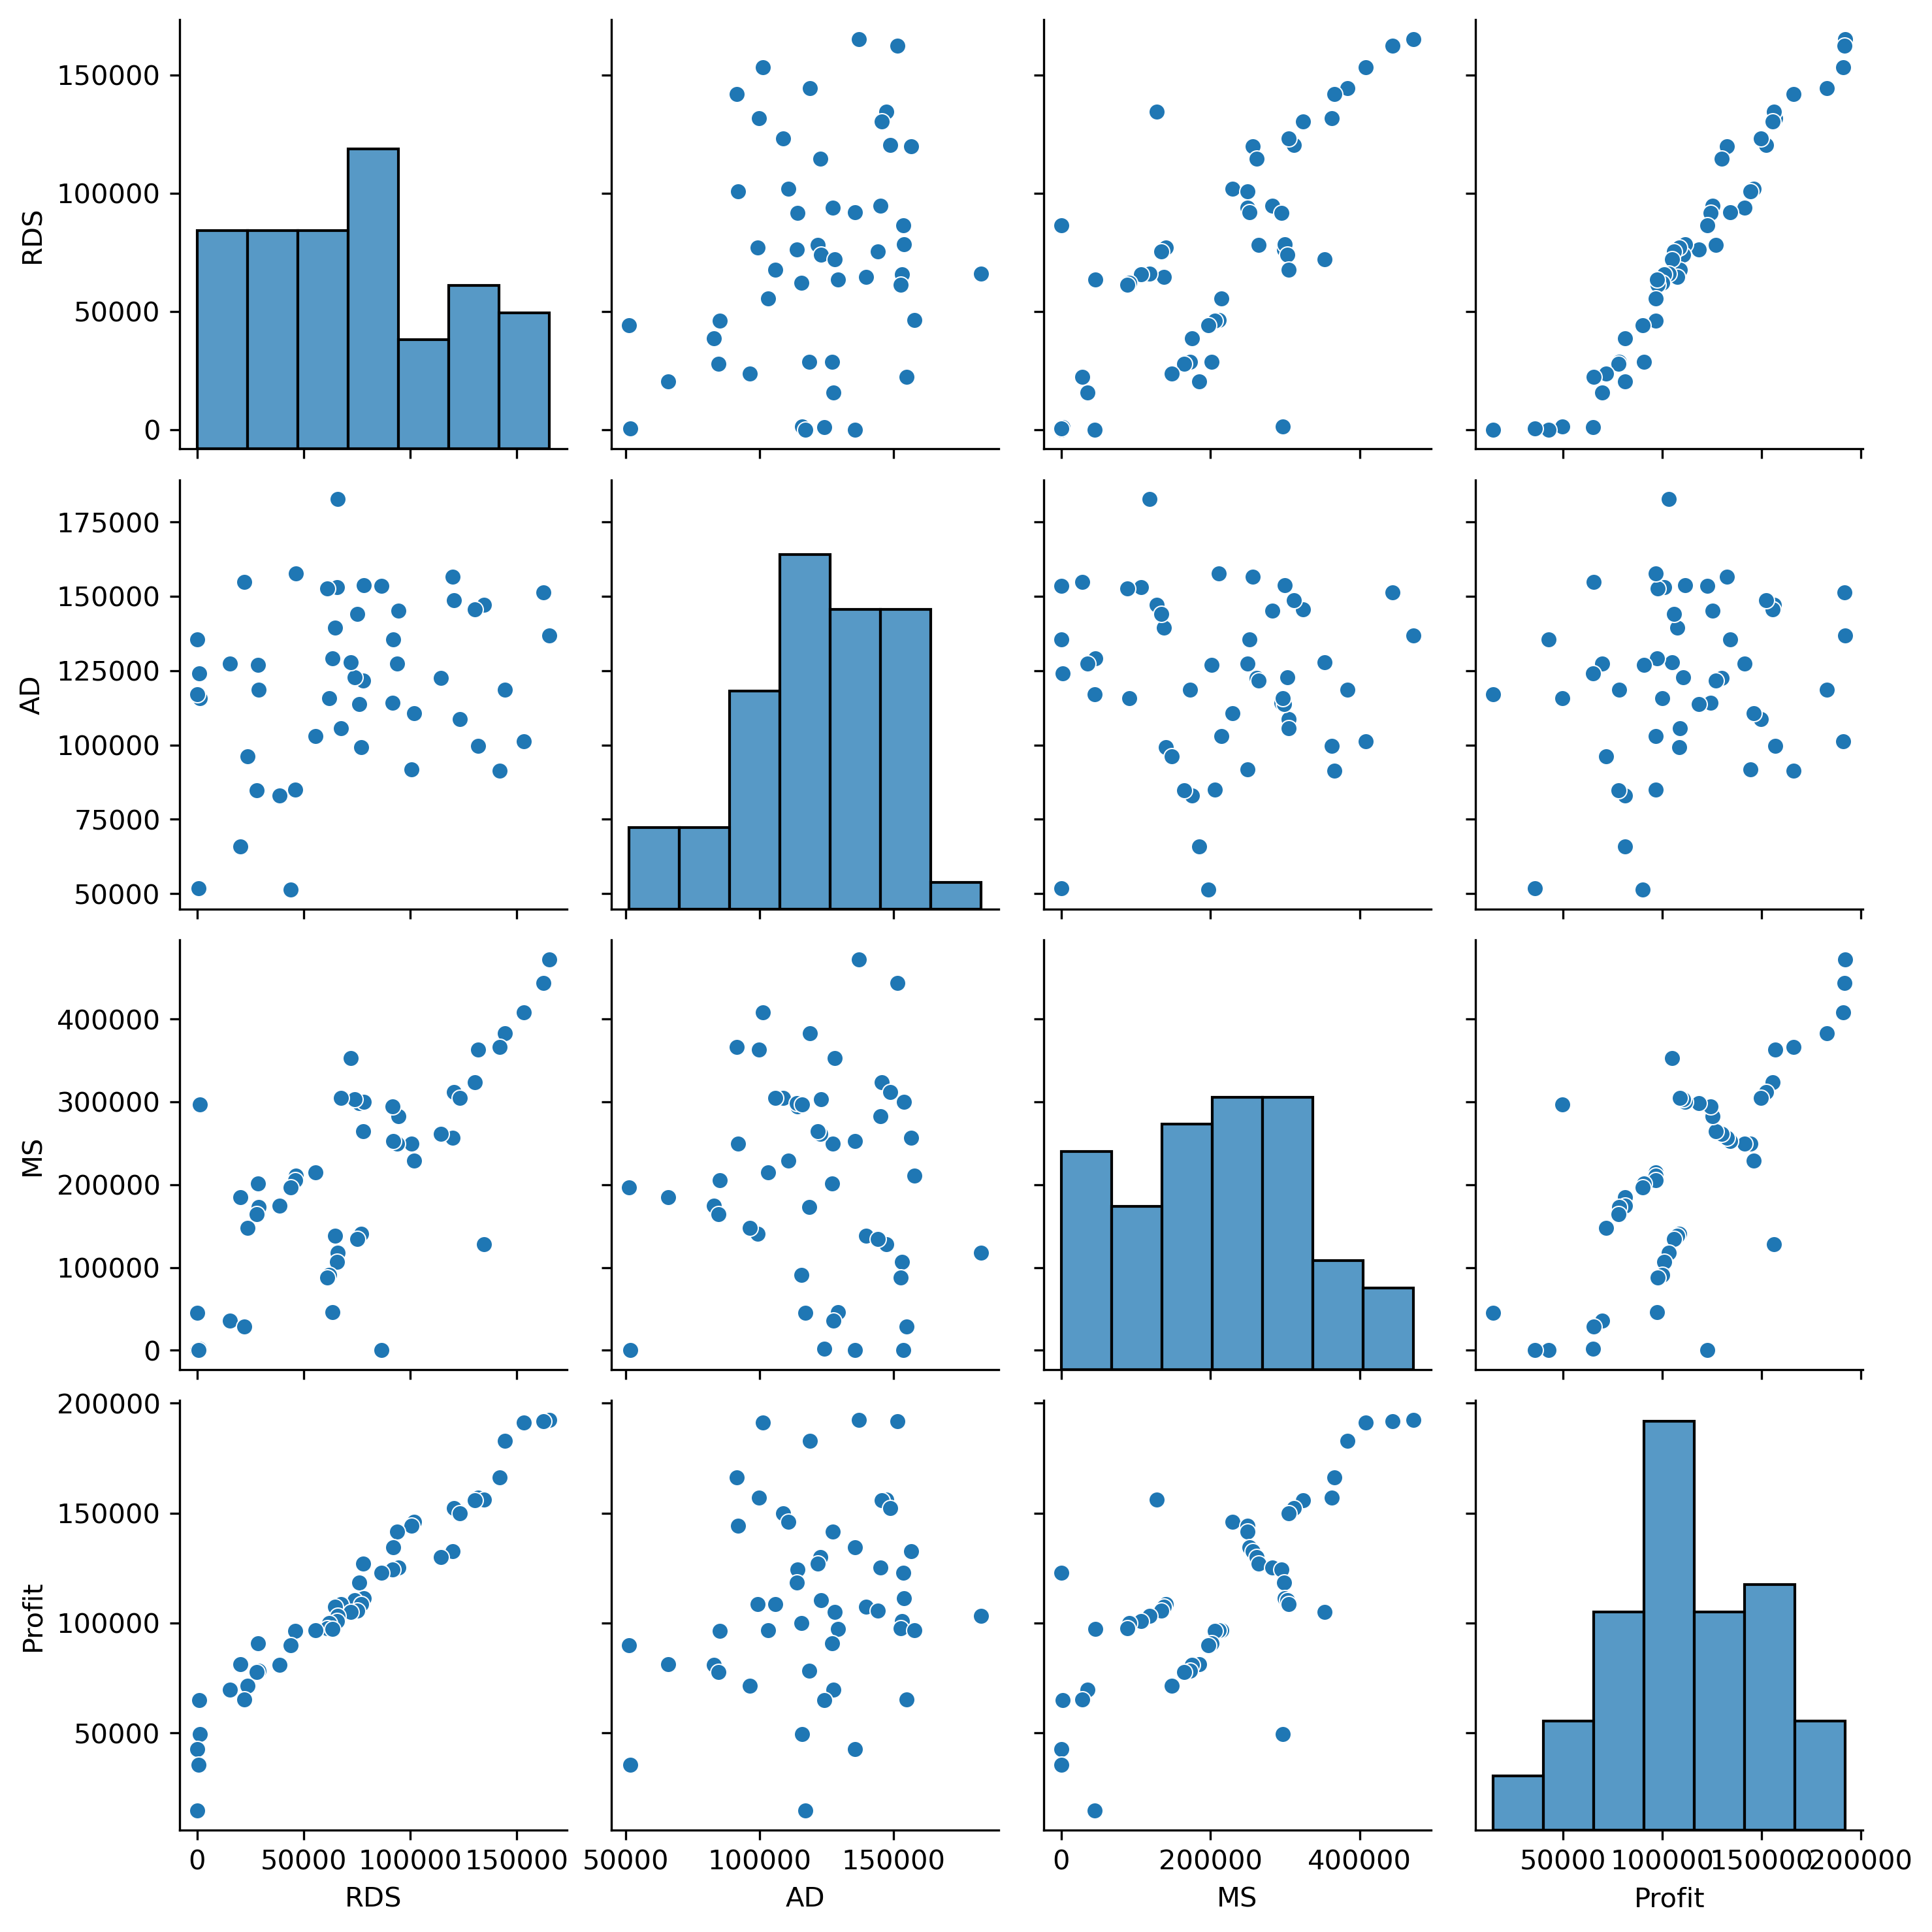

In [10]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.pairplot(df)

In [11]:
df.corr()

,RDS,AD,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

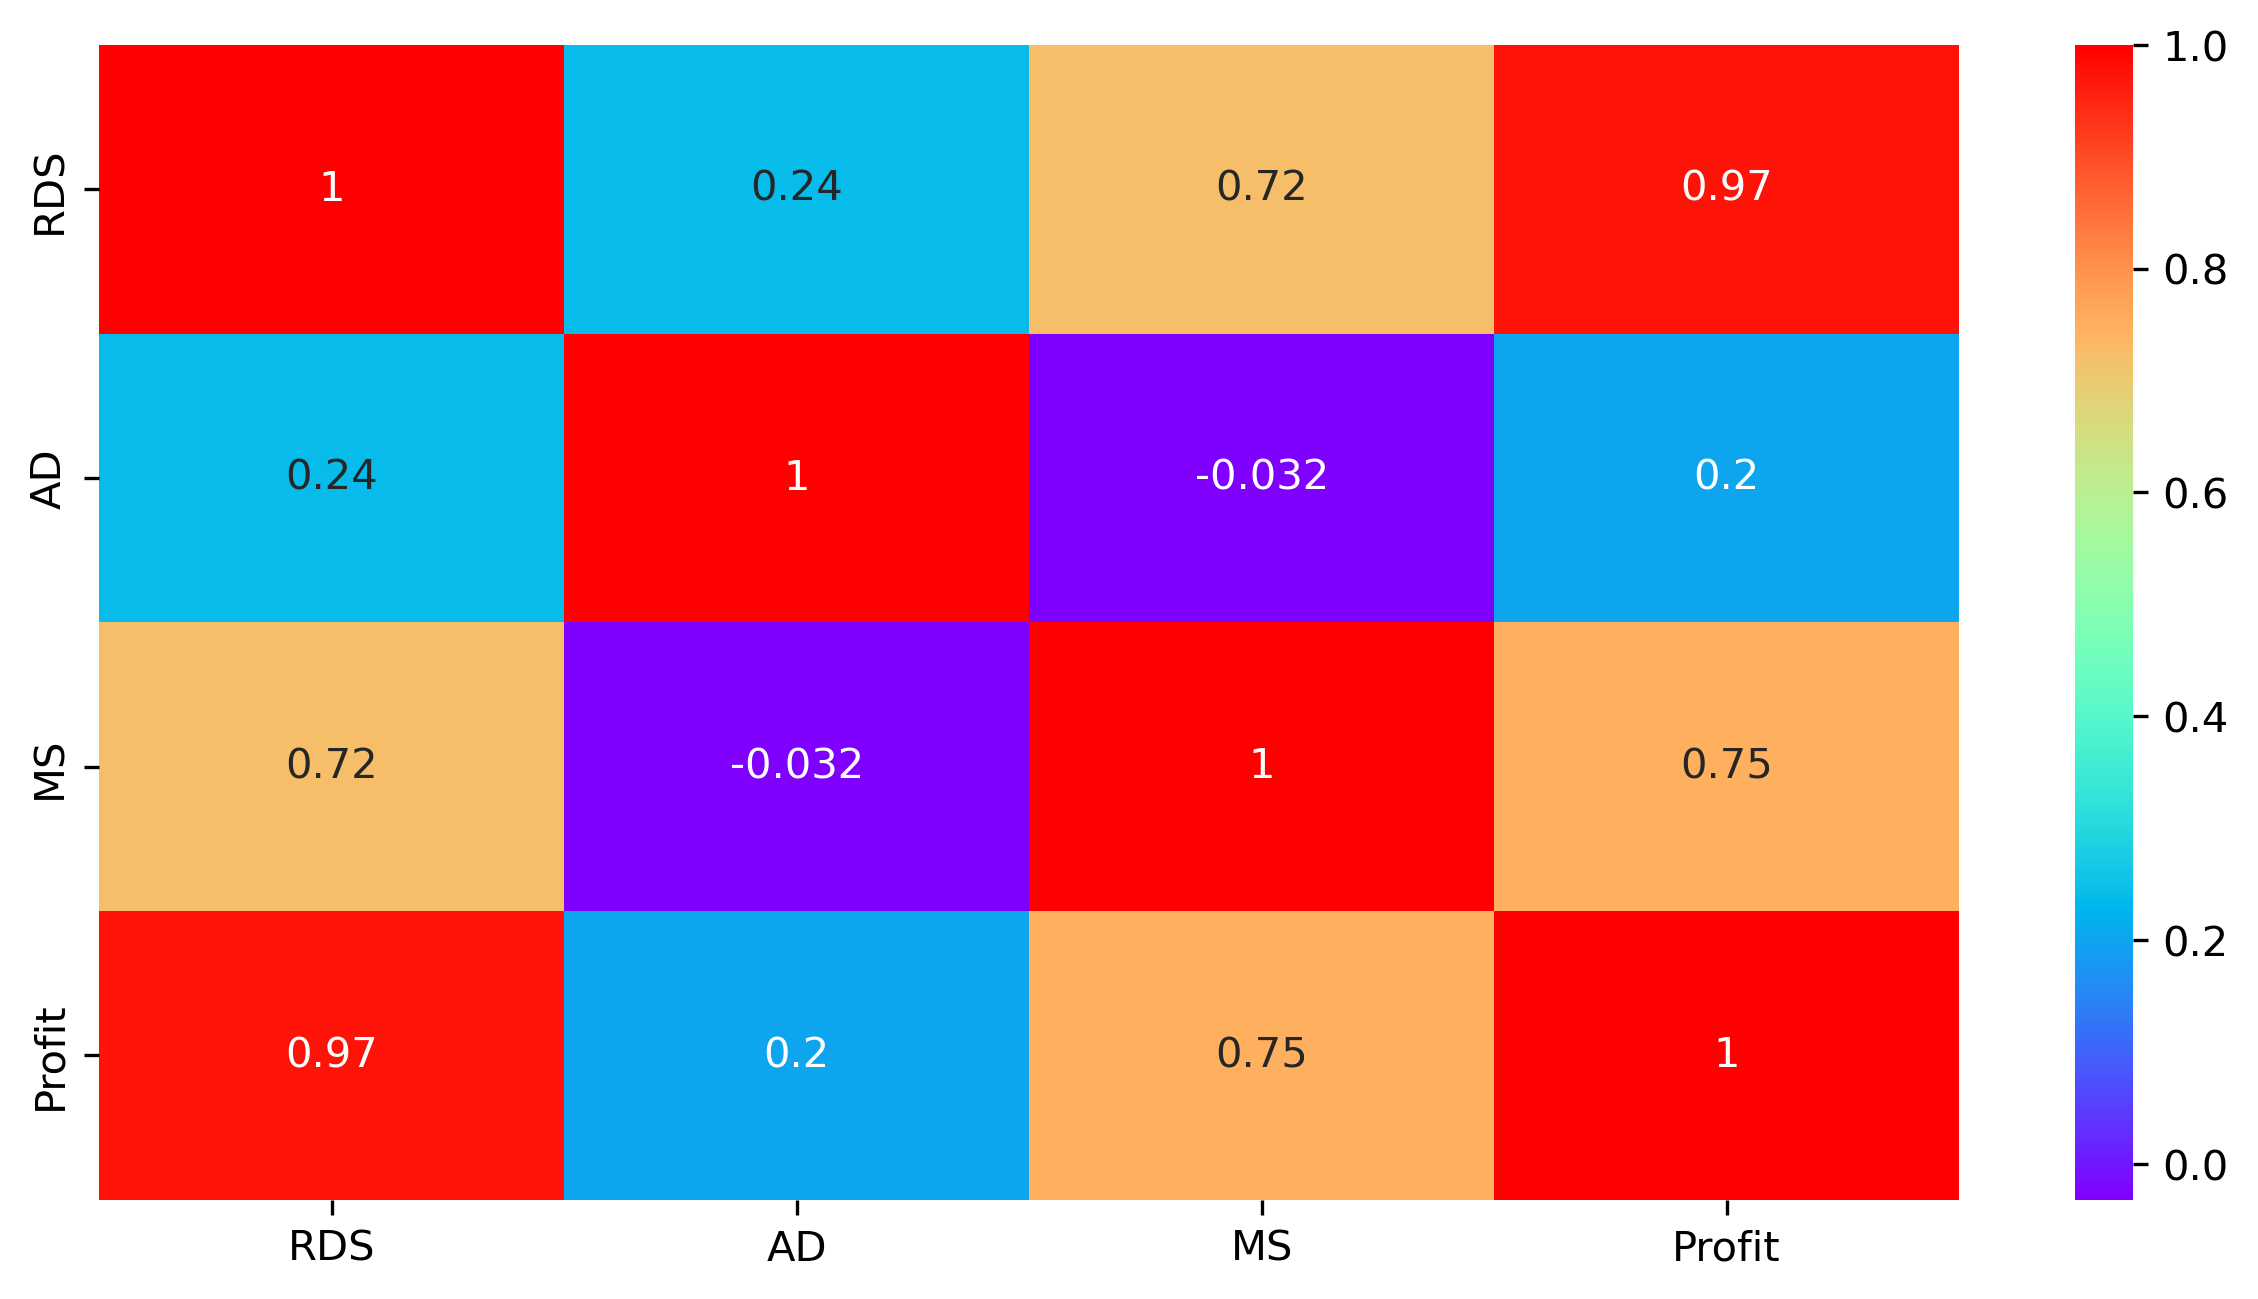

In [12]:
# Heatmap
sns.heatmap(df.corr(),annot= True, cmap='rainbow')


# Preparing Model

In [13]:
import statsmodels.formula.api as smf



In [14]:
model = smf.ols('Profit~RDS+AD+MS',data=df).fit()

In [15]:
model.params

Intercept    50122.192990
RDS              0.805715
AD              -0.026816
MS               0.027228
dtype: float64

In [16]:
print(model.pvalues)

Intercept    1.057379e-09
RDS          2.634968e-22
AD           6.017551e-01
MS           1.047168e-01
dtype: float64


In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        15:12:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
print(model.rsquared)

model.rsquared_adj

0.9507459940683246


0.9475337762901719

In [19]:
## Simple Linear Regrassion Model

In [20]:
AD_model = smf.ols('Profit~AD',data= df).fit()

In [21]:
AD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 07 Feb 2023   Prob (F-statistic):              0.162
Time:                        15:12:00   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
AD             0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
MS_model = smf.ols('Profit~MS',data= df).fit()

In [23]:
MS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           4.38e-10
Time:                        15:12:00   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df.columns

Index(['RDS', 'AD', 'MS', 'State', 'Profit'], dtype='object')

In [25]:
r_RDS = smf.ols('RDS~AD+MS',data=df).fit().rsquared
v_RDS = 1/(1-r_RDS)

r_AD = smf.ols('AD~RDS+MS',data=df).fit().rsquared
v_AD = 1/(1-r_AD)

r_MS = smf.ols('MS~RDS+AD',data = df).fit().rsquared
v_MS = 1/(1-r_MS)



In [26]:
vif = pd.DataFrame({
    'Feature_names':['RDS','AD','MS'],
    'VIF': [v_RDS,v_AD,v_MS]
})

In [27]:
vif

,Feature_names,VIF
0,RDS,2.468903
1,AD,1.175091
2,MS,2.326773


## Residual Analysis


# Test for Normality of Residuals(Q-Q plot)

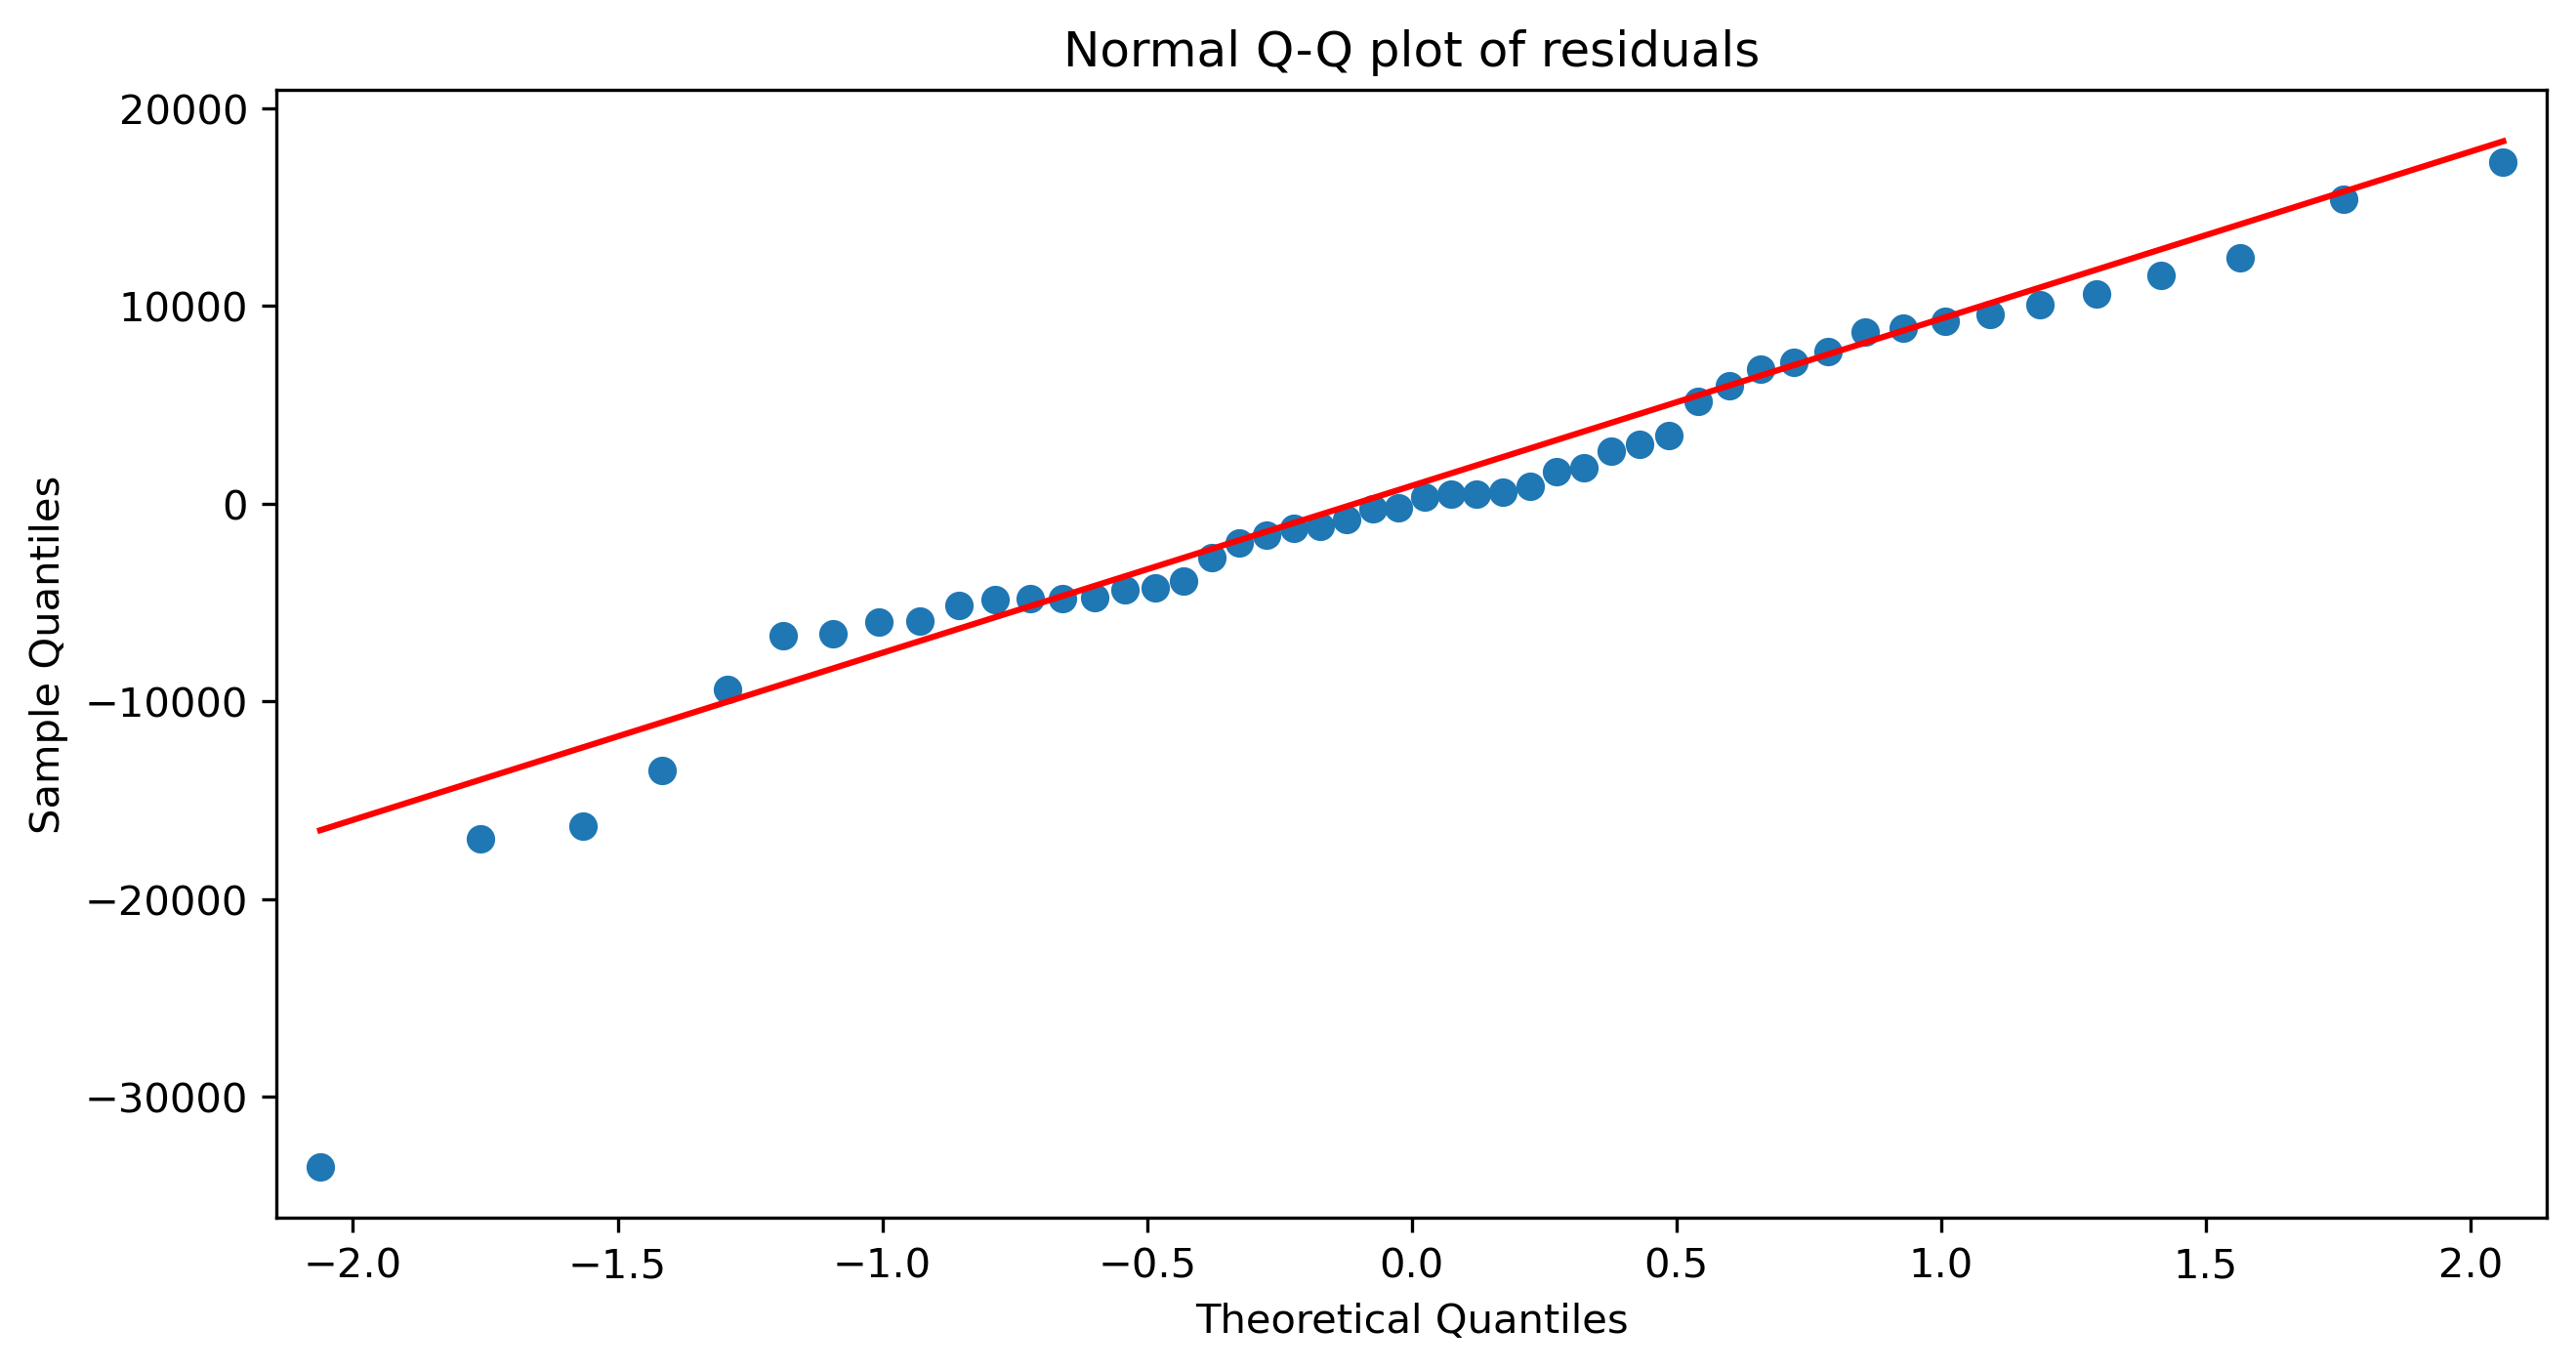

In [28]:
qqplot = sm.qqplot(model.resid,line ='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [29]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [30]:
##  Residaul plot for Homoscedasticity

In [31]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

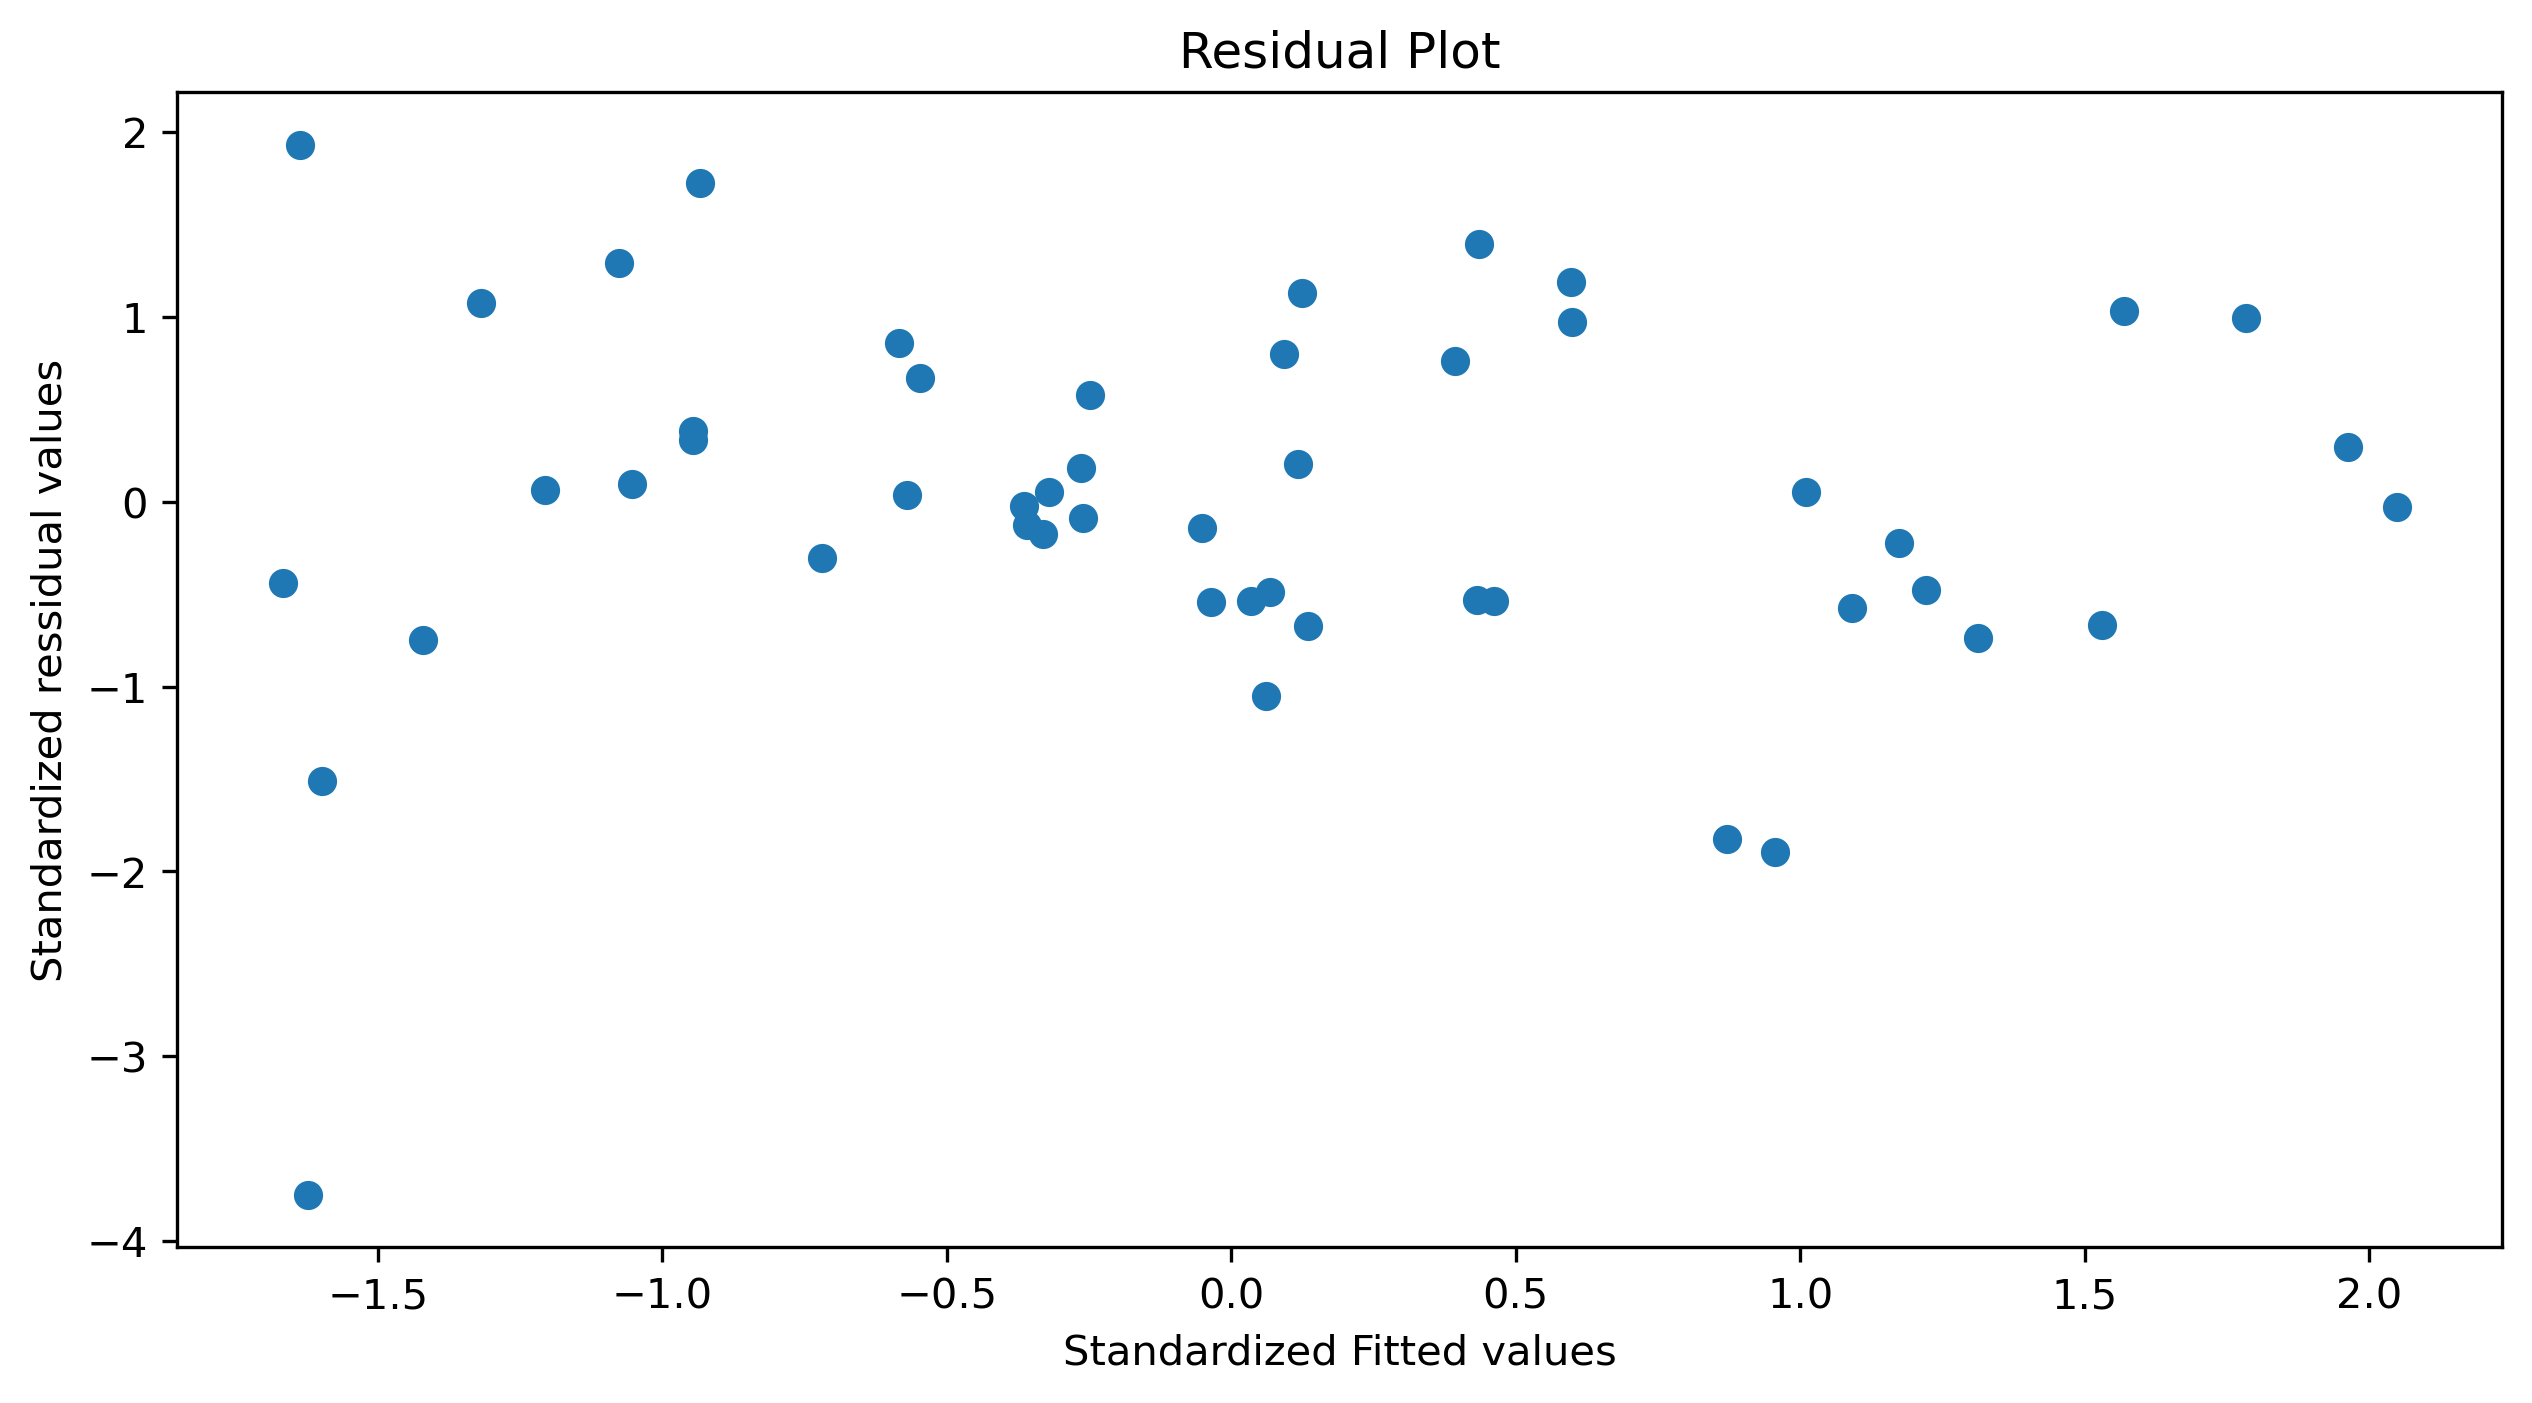

In [32]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized ressidual values')
plt.show()

In [33]:
## Residual Vs Regrassors

eval_env: 1


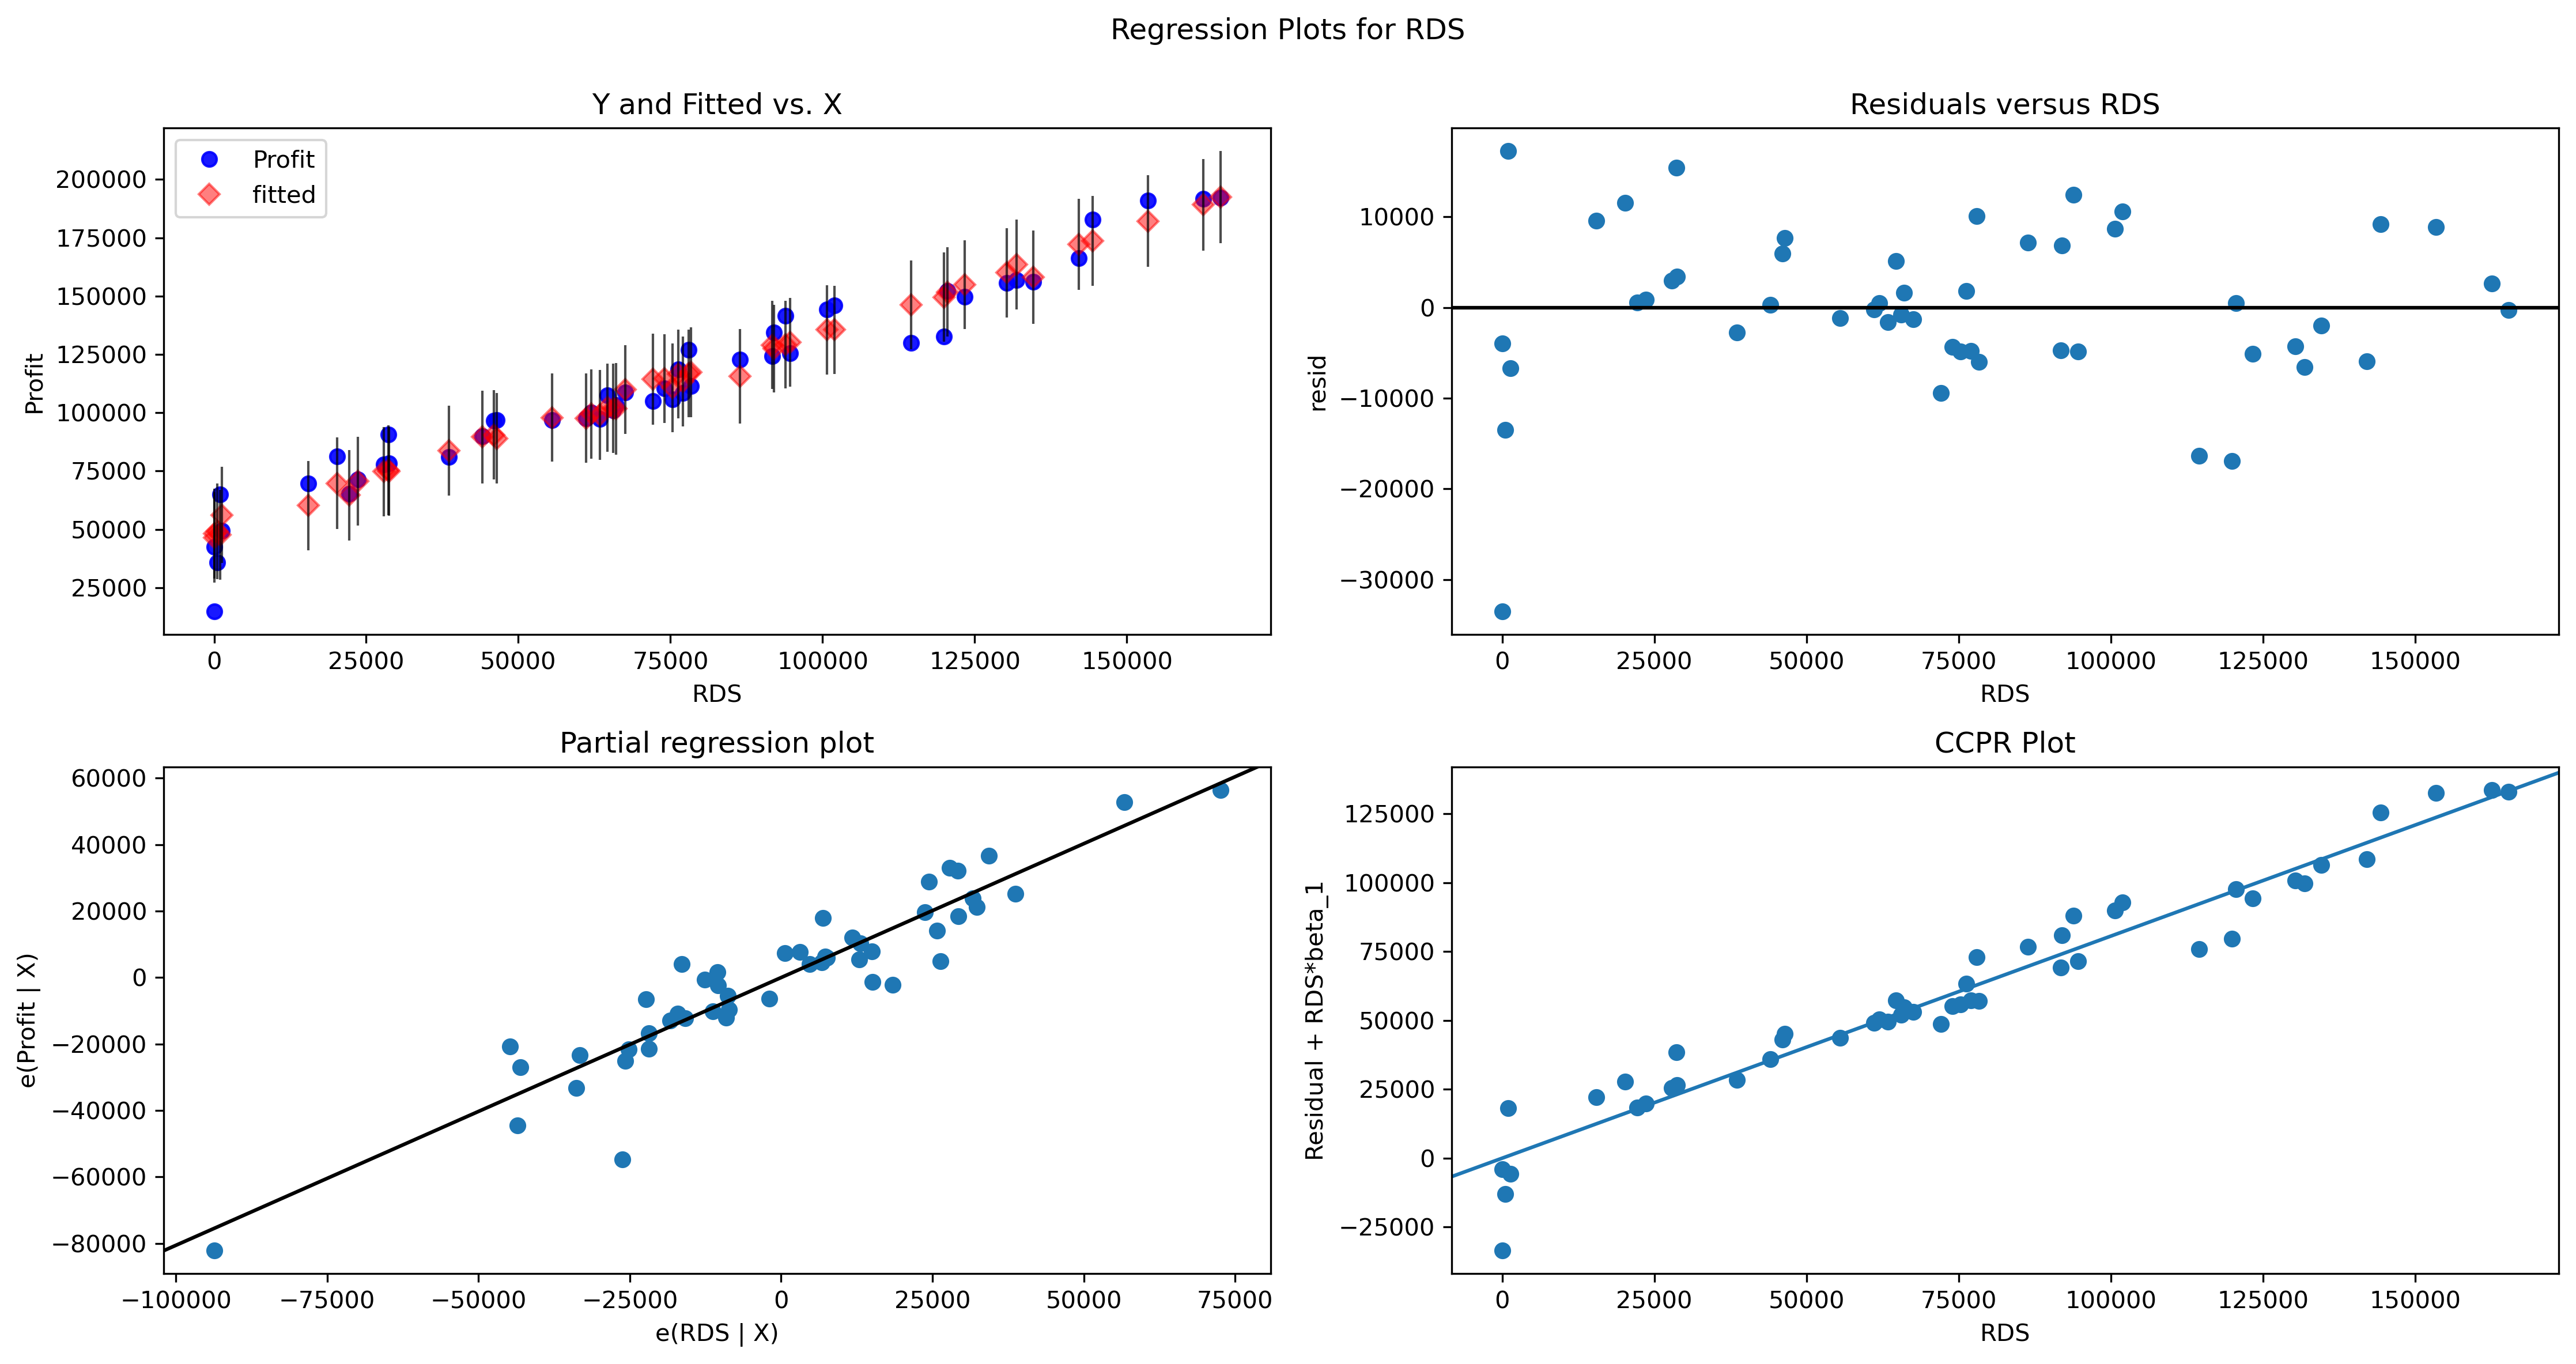

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'RDS', fig = fig)
plt.show()

eval_env: 1


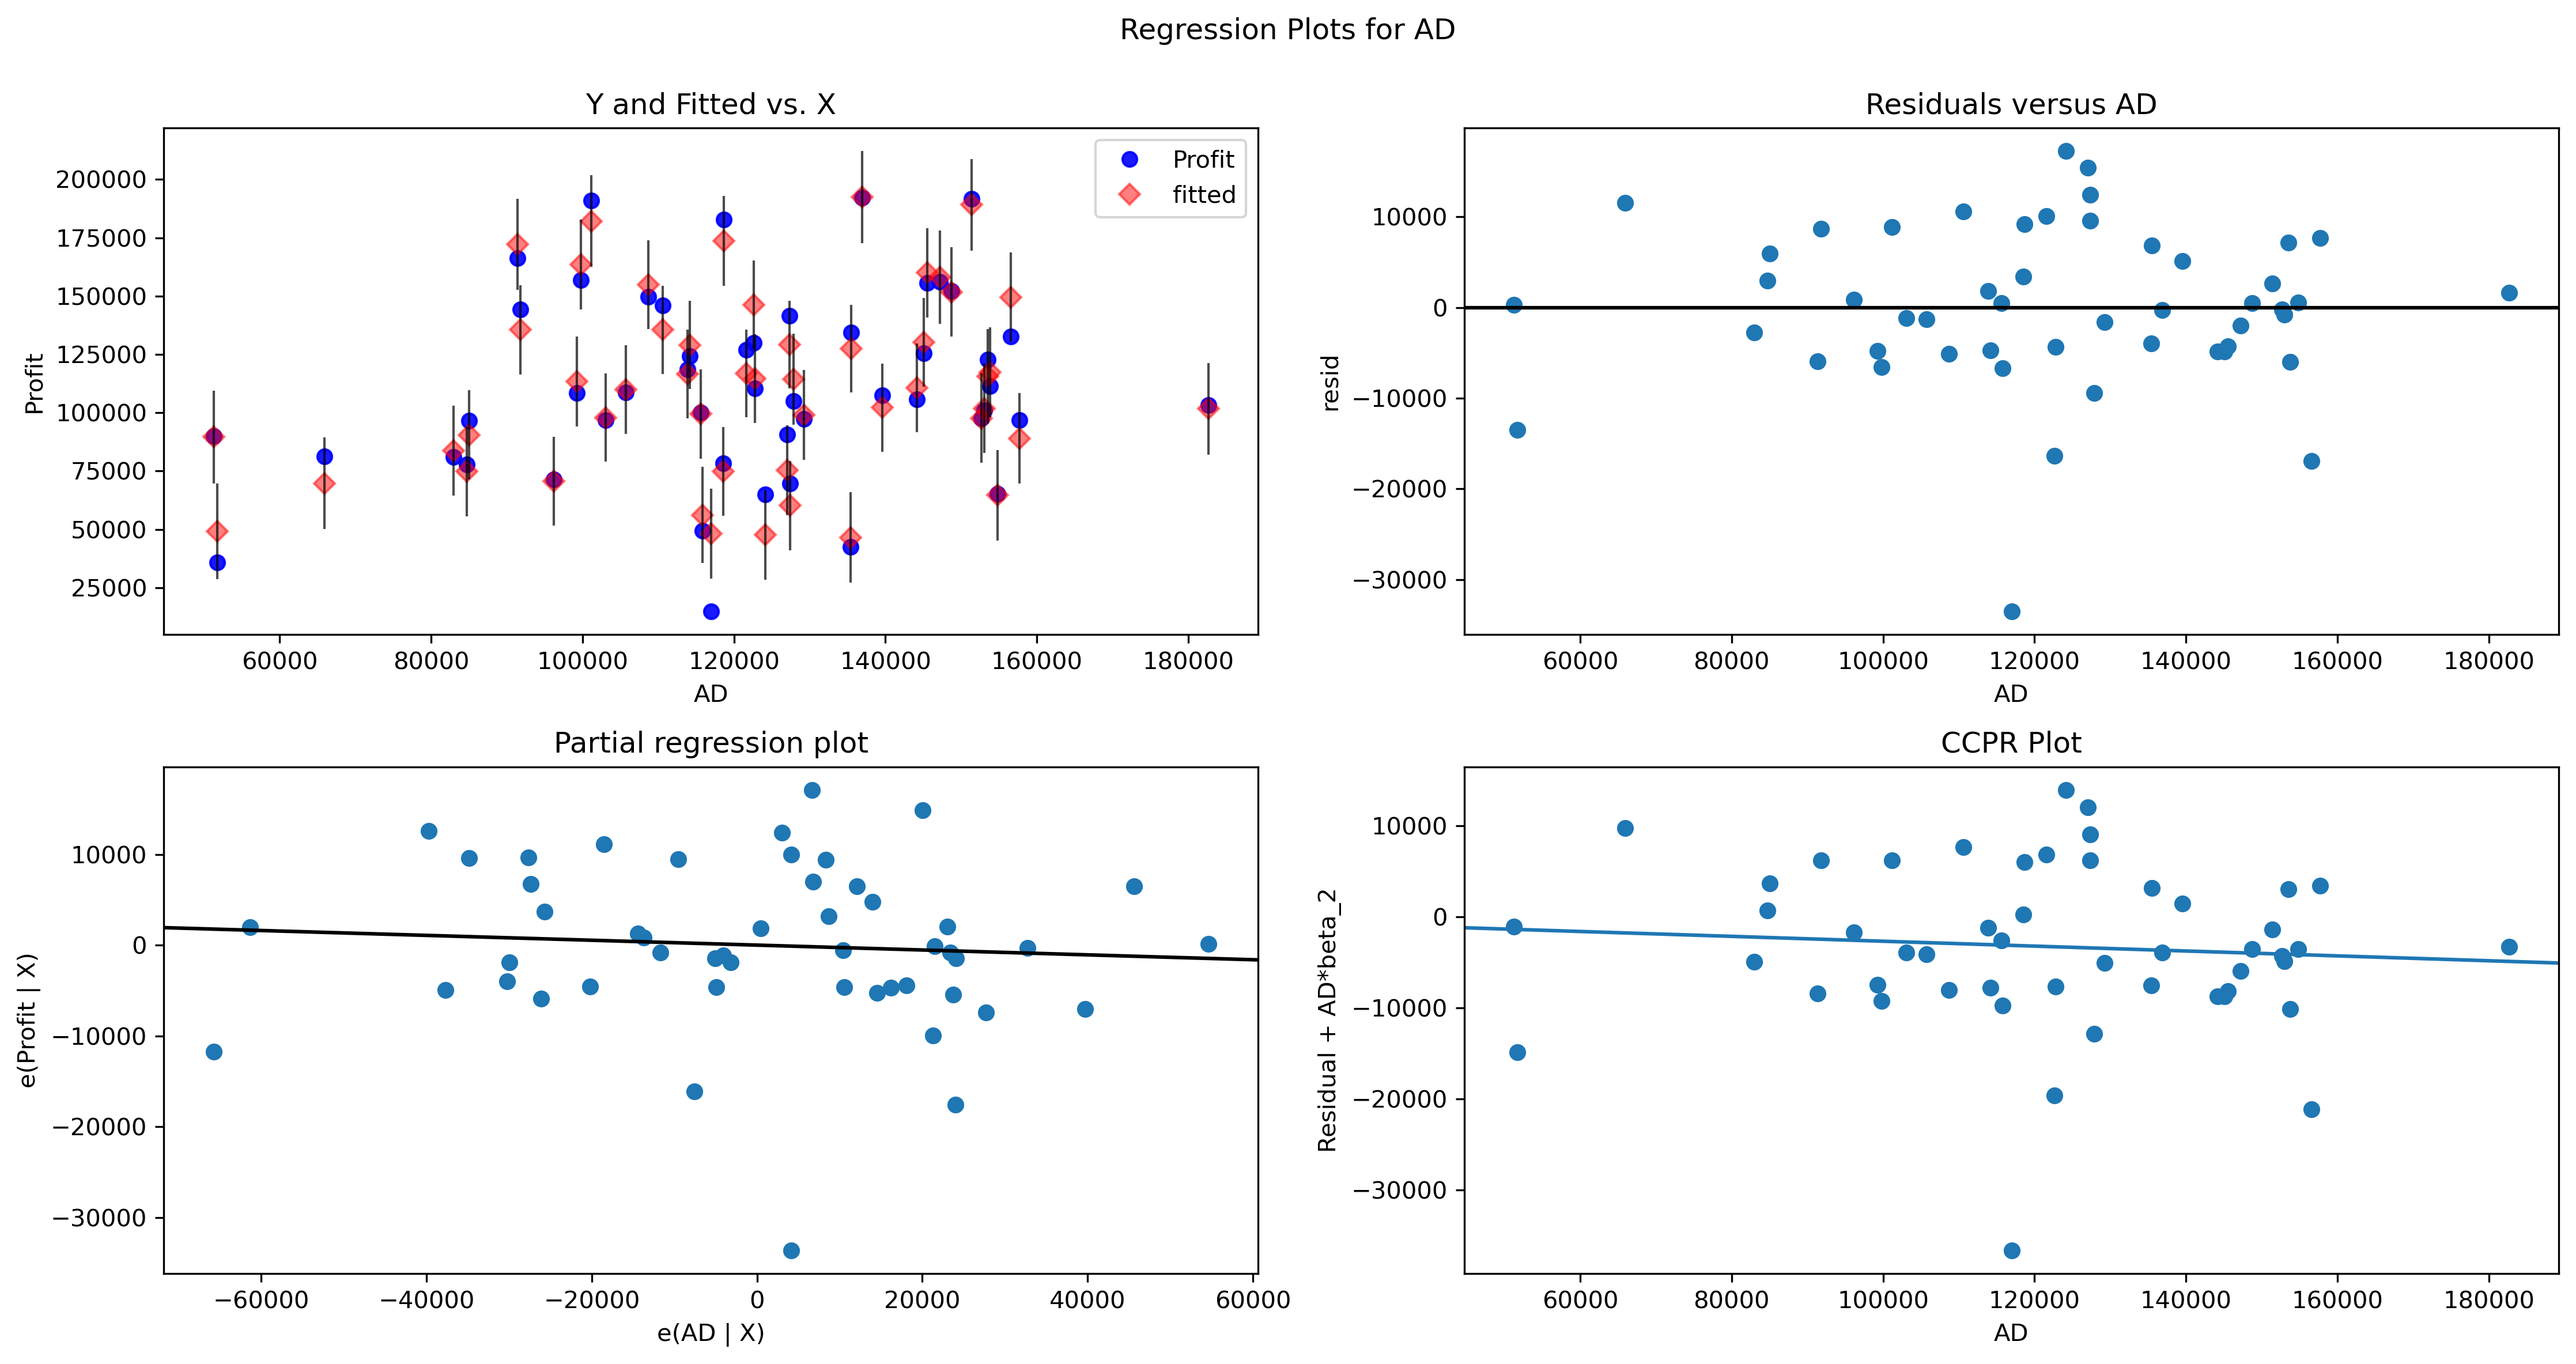

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'AD',fig=fig)
plt.show()

eval_env: 1


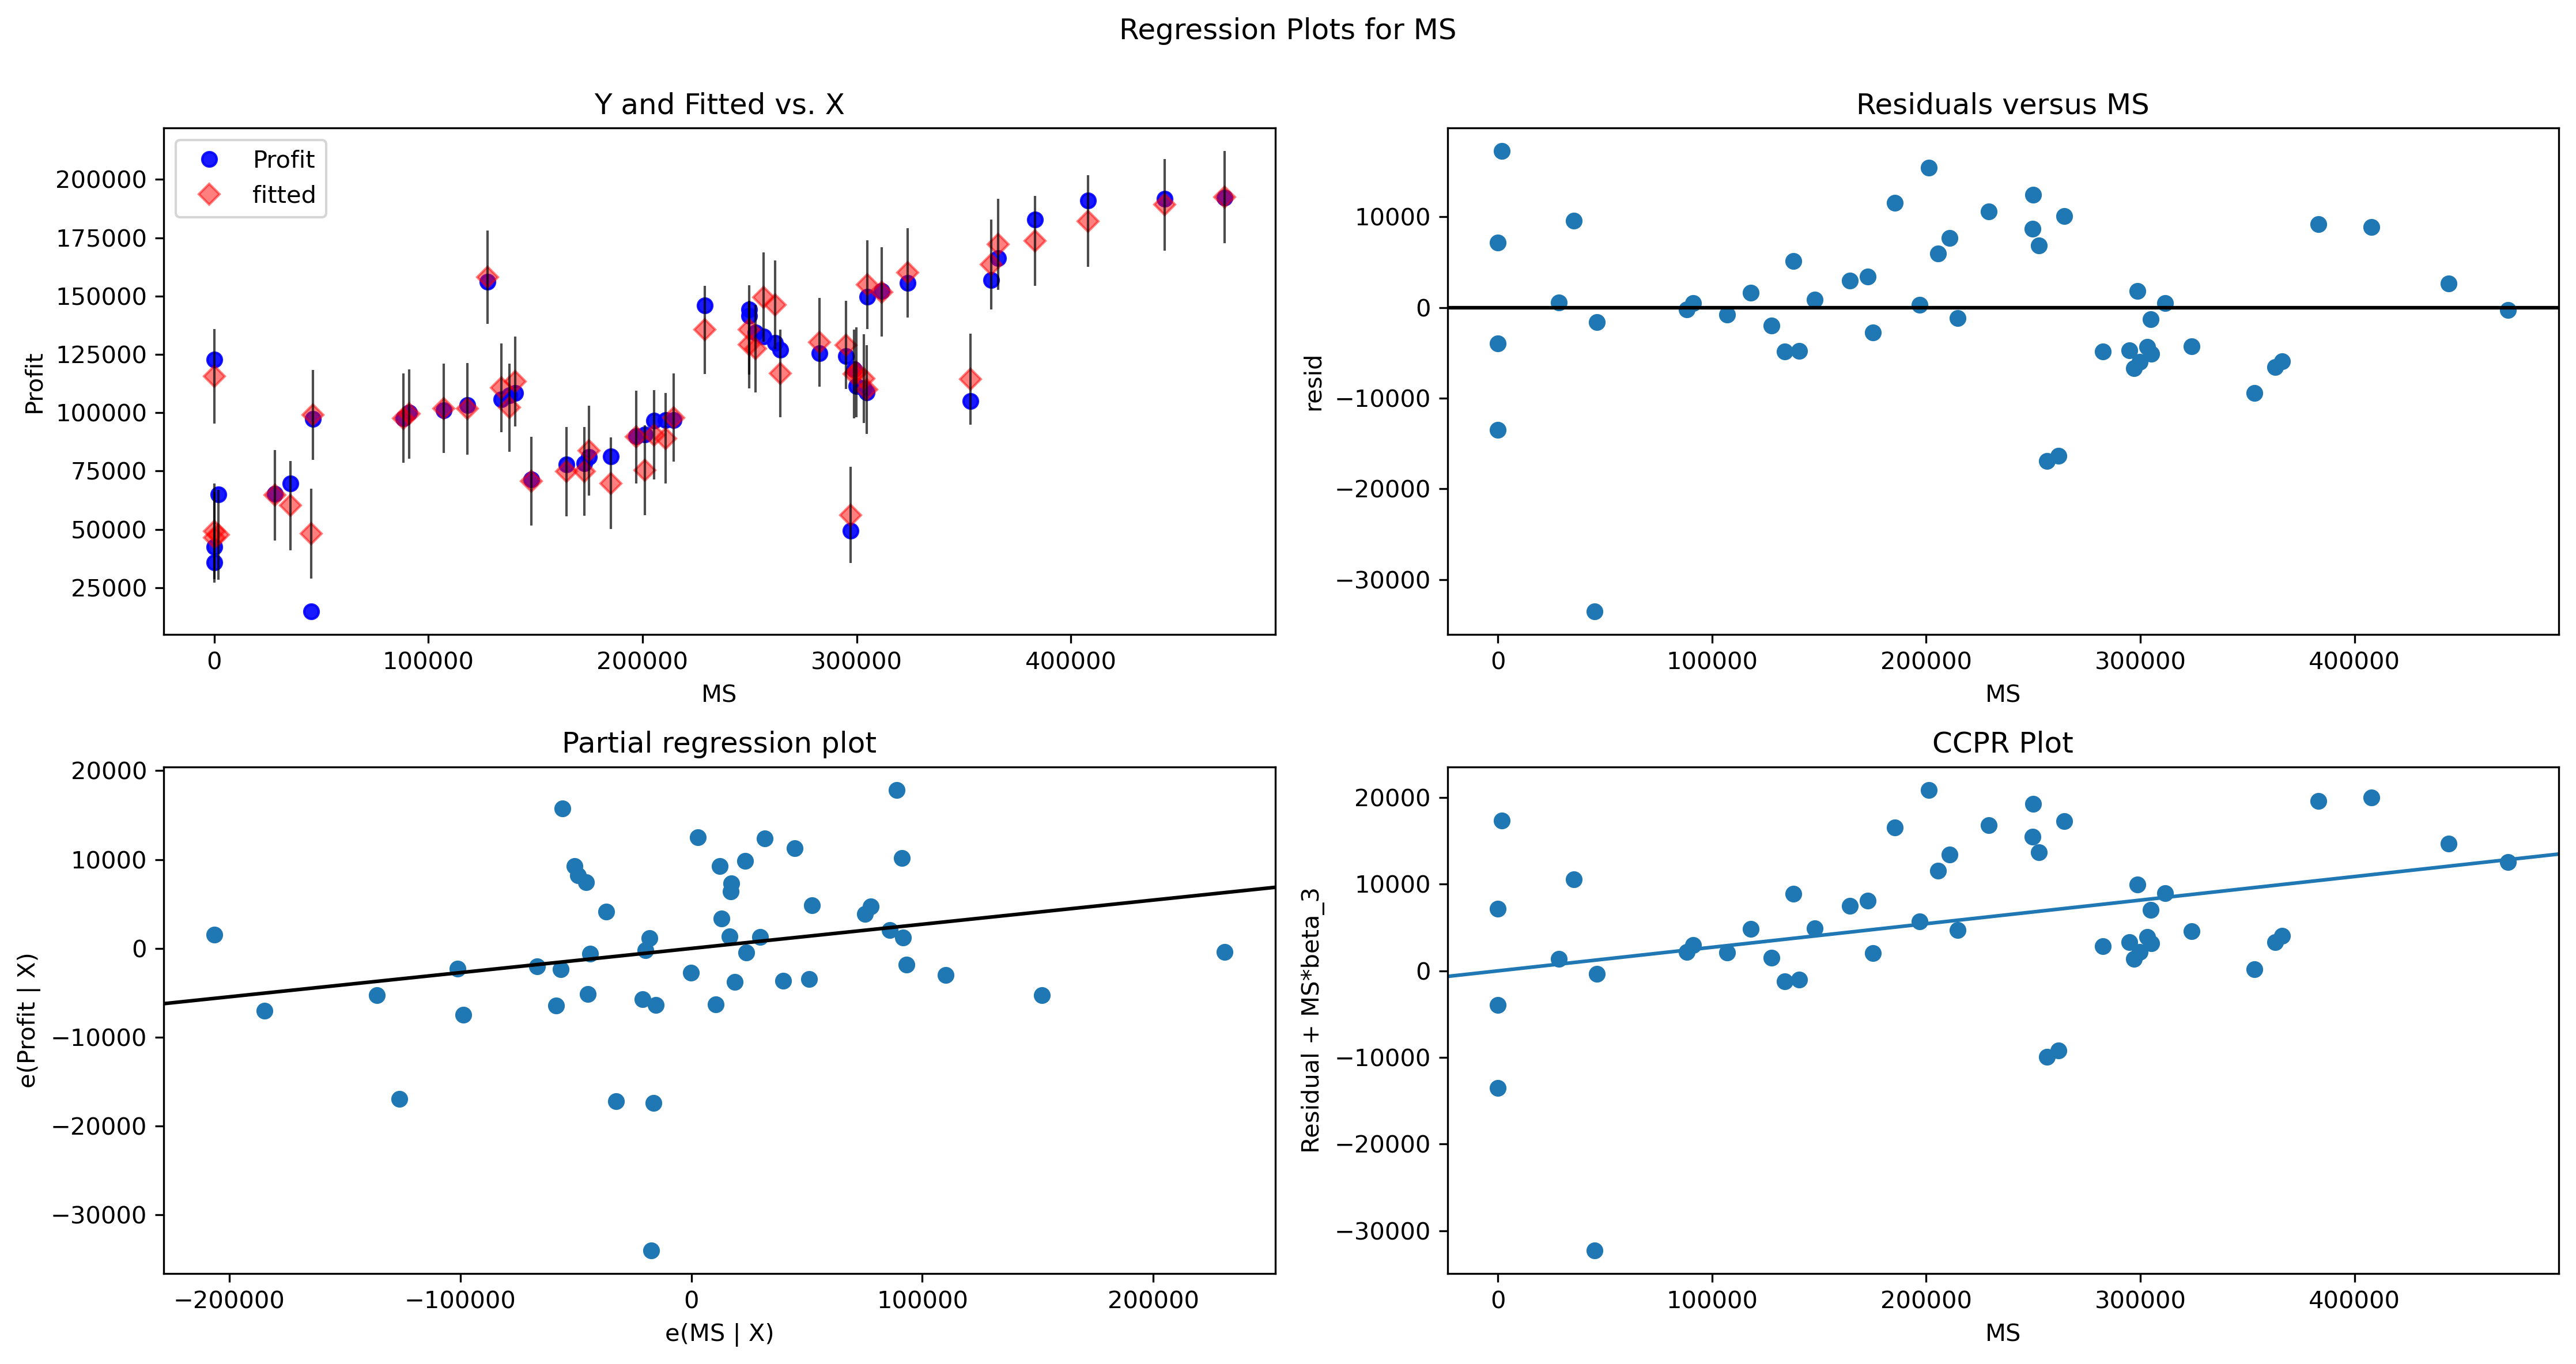

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

In [37]:
## Model Deletion Diagnostics

 ## Detecting Influencers/Outliers

## Cook's Distance

In [38]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

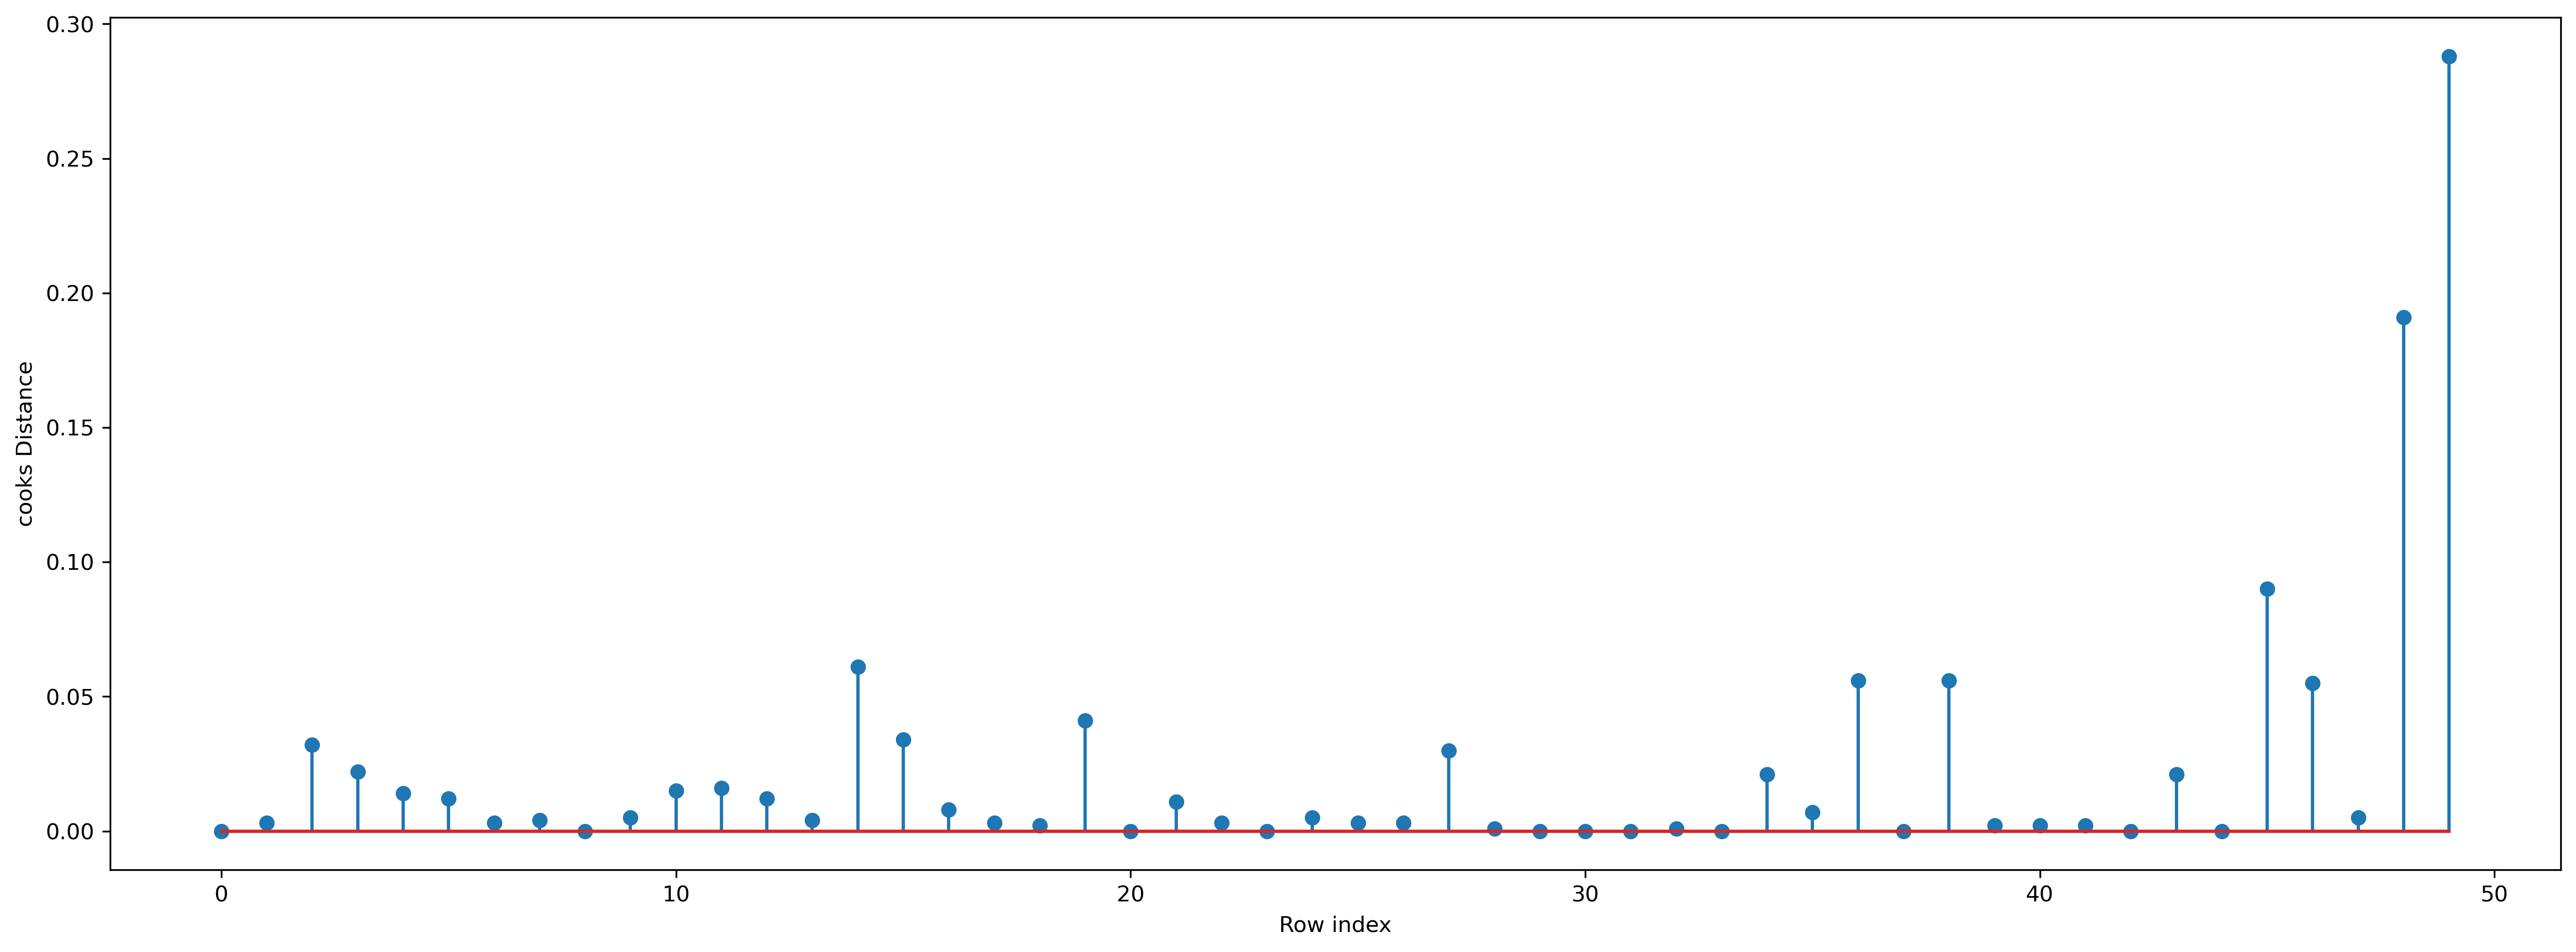

In [39]:
#plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks Distance')
plt.show()

In [40]:
# index and value of influencer where c is more than  .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [41]:
## HIgh Influence Points

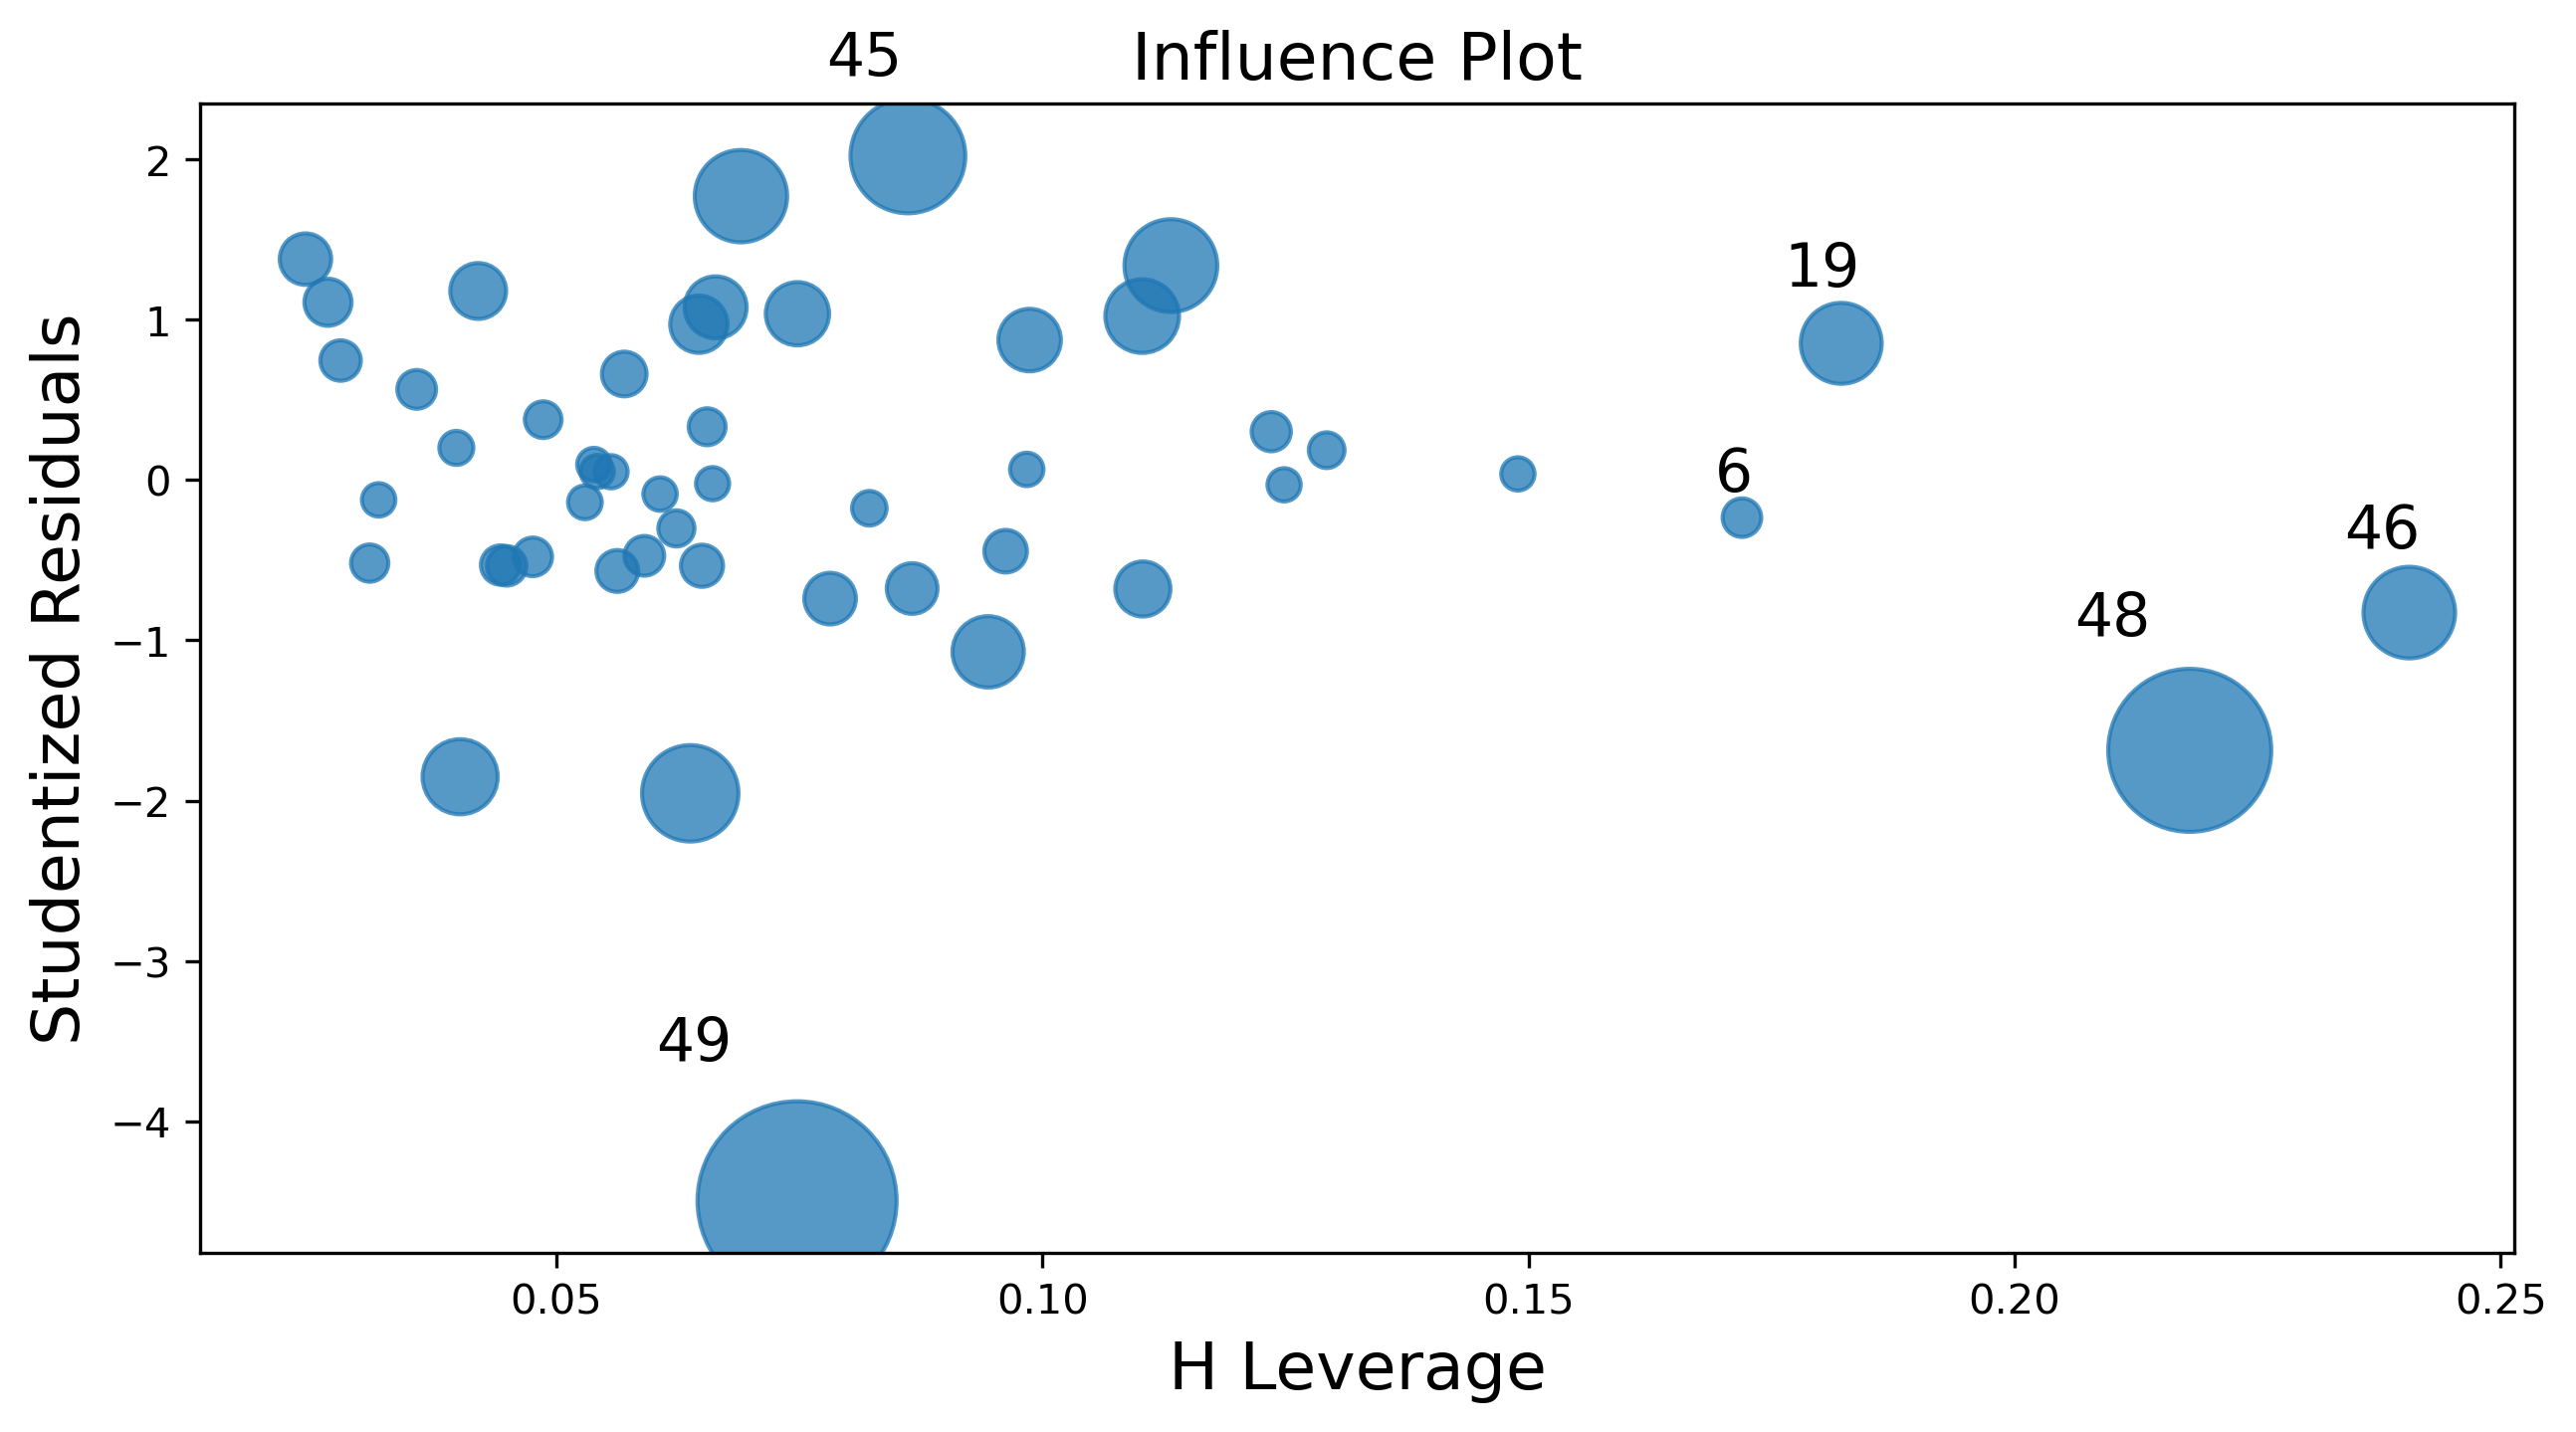

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [43]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.36

In [44]:
df[df.index.isin([49])]

,RDS,AD,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


 ## Improving the model

In [45]:
df1 = pd.read_csv('50_Startups.csv')

In [46]:
df2 = df1.drop(df.index[[49]],axis=0).reset_index()

In [47]:
df

,RDS,AD,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Model Predictions

In [48]:
new_data= pd.DataFrame({'RDS':60000,'AD':80000,'MS':150000},index=[0])
new_data

,RDS,AD,MS
0,60000,80000,150000


In [49]:
model.predict(new_data)

0    100404.028233
dtype: float64

In [50]:
pred_y = model.predict(df)
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [51]:
D2 = {'Prep_Models':['Model','Model'],'Rsquared':[model.rsquared,model.rsquared]}
tabel = pd.DataFrame(D2)
tabel

,Prep_Models,Rsquared
0,Model,0.950746
1,Model,0.950746
